In [2]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
import scipy.stats as stats
from sklearn.model_selection import train_test_split
%matplotlib inline

## 데이터 불러들이기 및 확인

In [3]:
train_df = pd.read_csv('C:/Users/1-11/Jupyter/02_house_price/train.csv')
test_df = pd.read_csv('C:/Users/1-11/Jupyter/02_house_price/test.csv')

In [4]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

## 이상치에 대해서 확인

<Figure size 432x288 with 0 Axes>

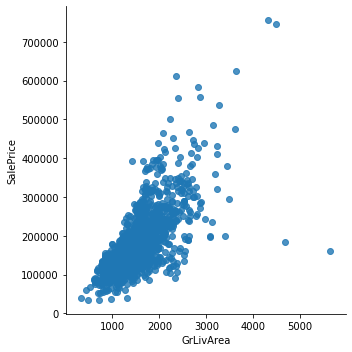

In [7]:
plt.figure()
otl = sns.lmplot('GrLivArea','SalePrice', data=train_df, fit_reg=False)

- 위에 대한 데이터를 보고, outlier를 처리하기 위한 조건 선택

In [8]:
train_df[train_df['GrLivArea']>4000][['SalePrice','GrLivArea']]

,SalePrice,GrLivArea
523,184750,4676
691,755000,4316
1182,745000,4476
1298,160000,5642


(0, 800000)

<Figure size 432x288 with 0 Axes>

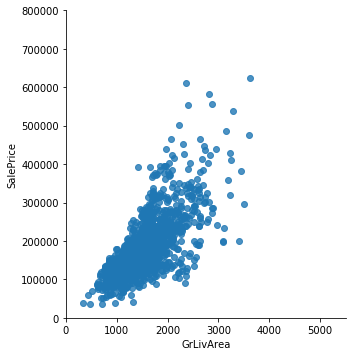

In [9]:
train_df.drop(train_df[train_df['GrLivArea']>4000].index, inplace=True)

plt.figure()
sns.lmplot('GrLivArea','SalePrice', data=train_df, fit_reg=False)
plt.xlim(0,5500)
plt.ylim(0,800000)

- Target 확인

Skewness: 1.566


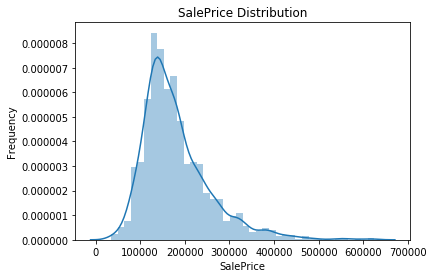

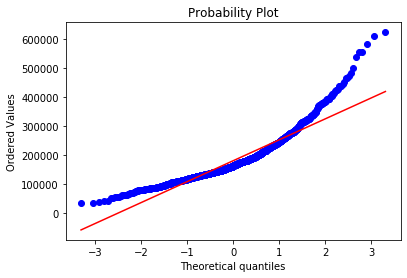

In [10]:
sns.distplot(train_df['SalePrice'])
plt.title('SalePrice Distribution')
plt.ylabel('Frequency')
plt.figure()

qq = stats.probplot(np.array(train_df['SalePrice']), plot=plt)
print('Skewness: {:.3f}'.format(train_df['SalePrice'].skew()))

- 타겟에 대한 로그변환 취하기 : 양수에 대해서 처리 하고자 하니 +1을 하고 로그를 취해서 0의 값에 대해서 발생할 수 있는 문제 방지

In [11]:
# log1p calculates log(1 + input)
train_df['SalePrice'] = np.log1p(train_df['SalePrice'])

- 로그를 취하면 그 결과가 치우친 부분들이 어떻게 되는지 확인

Skewness: 0.065


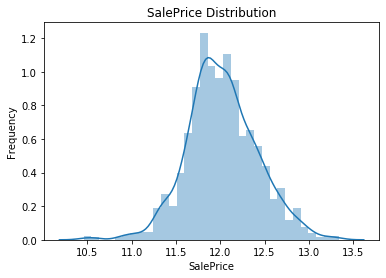

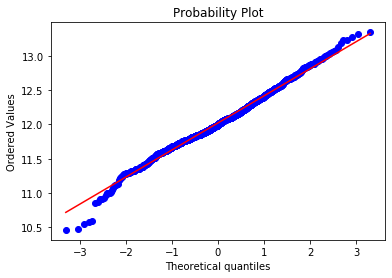

In [12]:
sns.distplot(train_df['SalePrice'])
plt.title('SalePrice Distribution')
plt.ylabel('Frequency')
plt.figure()

qq = stats.probplot(np.array(train_df['SalePrice']), plot=plt)
print('Skewness: {:.3f}'.format(train_df['SalePrice'].skew()))

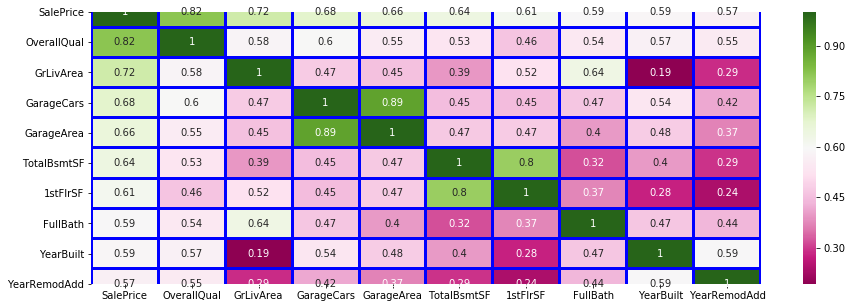

In [13]:
plt.figure(figsize = (15,5))

corr_train = train_df.corr()

num = 10
col = corr_train.nlargest(num, 'SalePrice')['SalePrice'].index
coeff = np.corrcoef(train_df[col].values.T)

# heatmap
heatmap = sns.heatmap(coeff, annot=True, xticklabels=col.values, yticklabels=col.values, linewidth=2, cmap='PiYG', linecolor='blue')

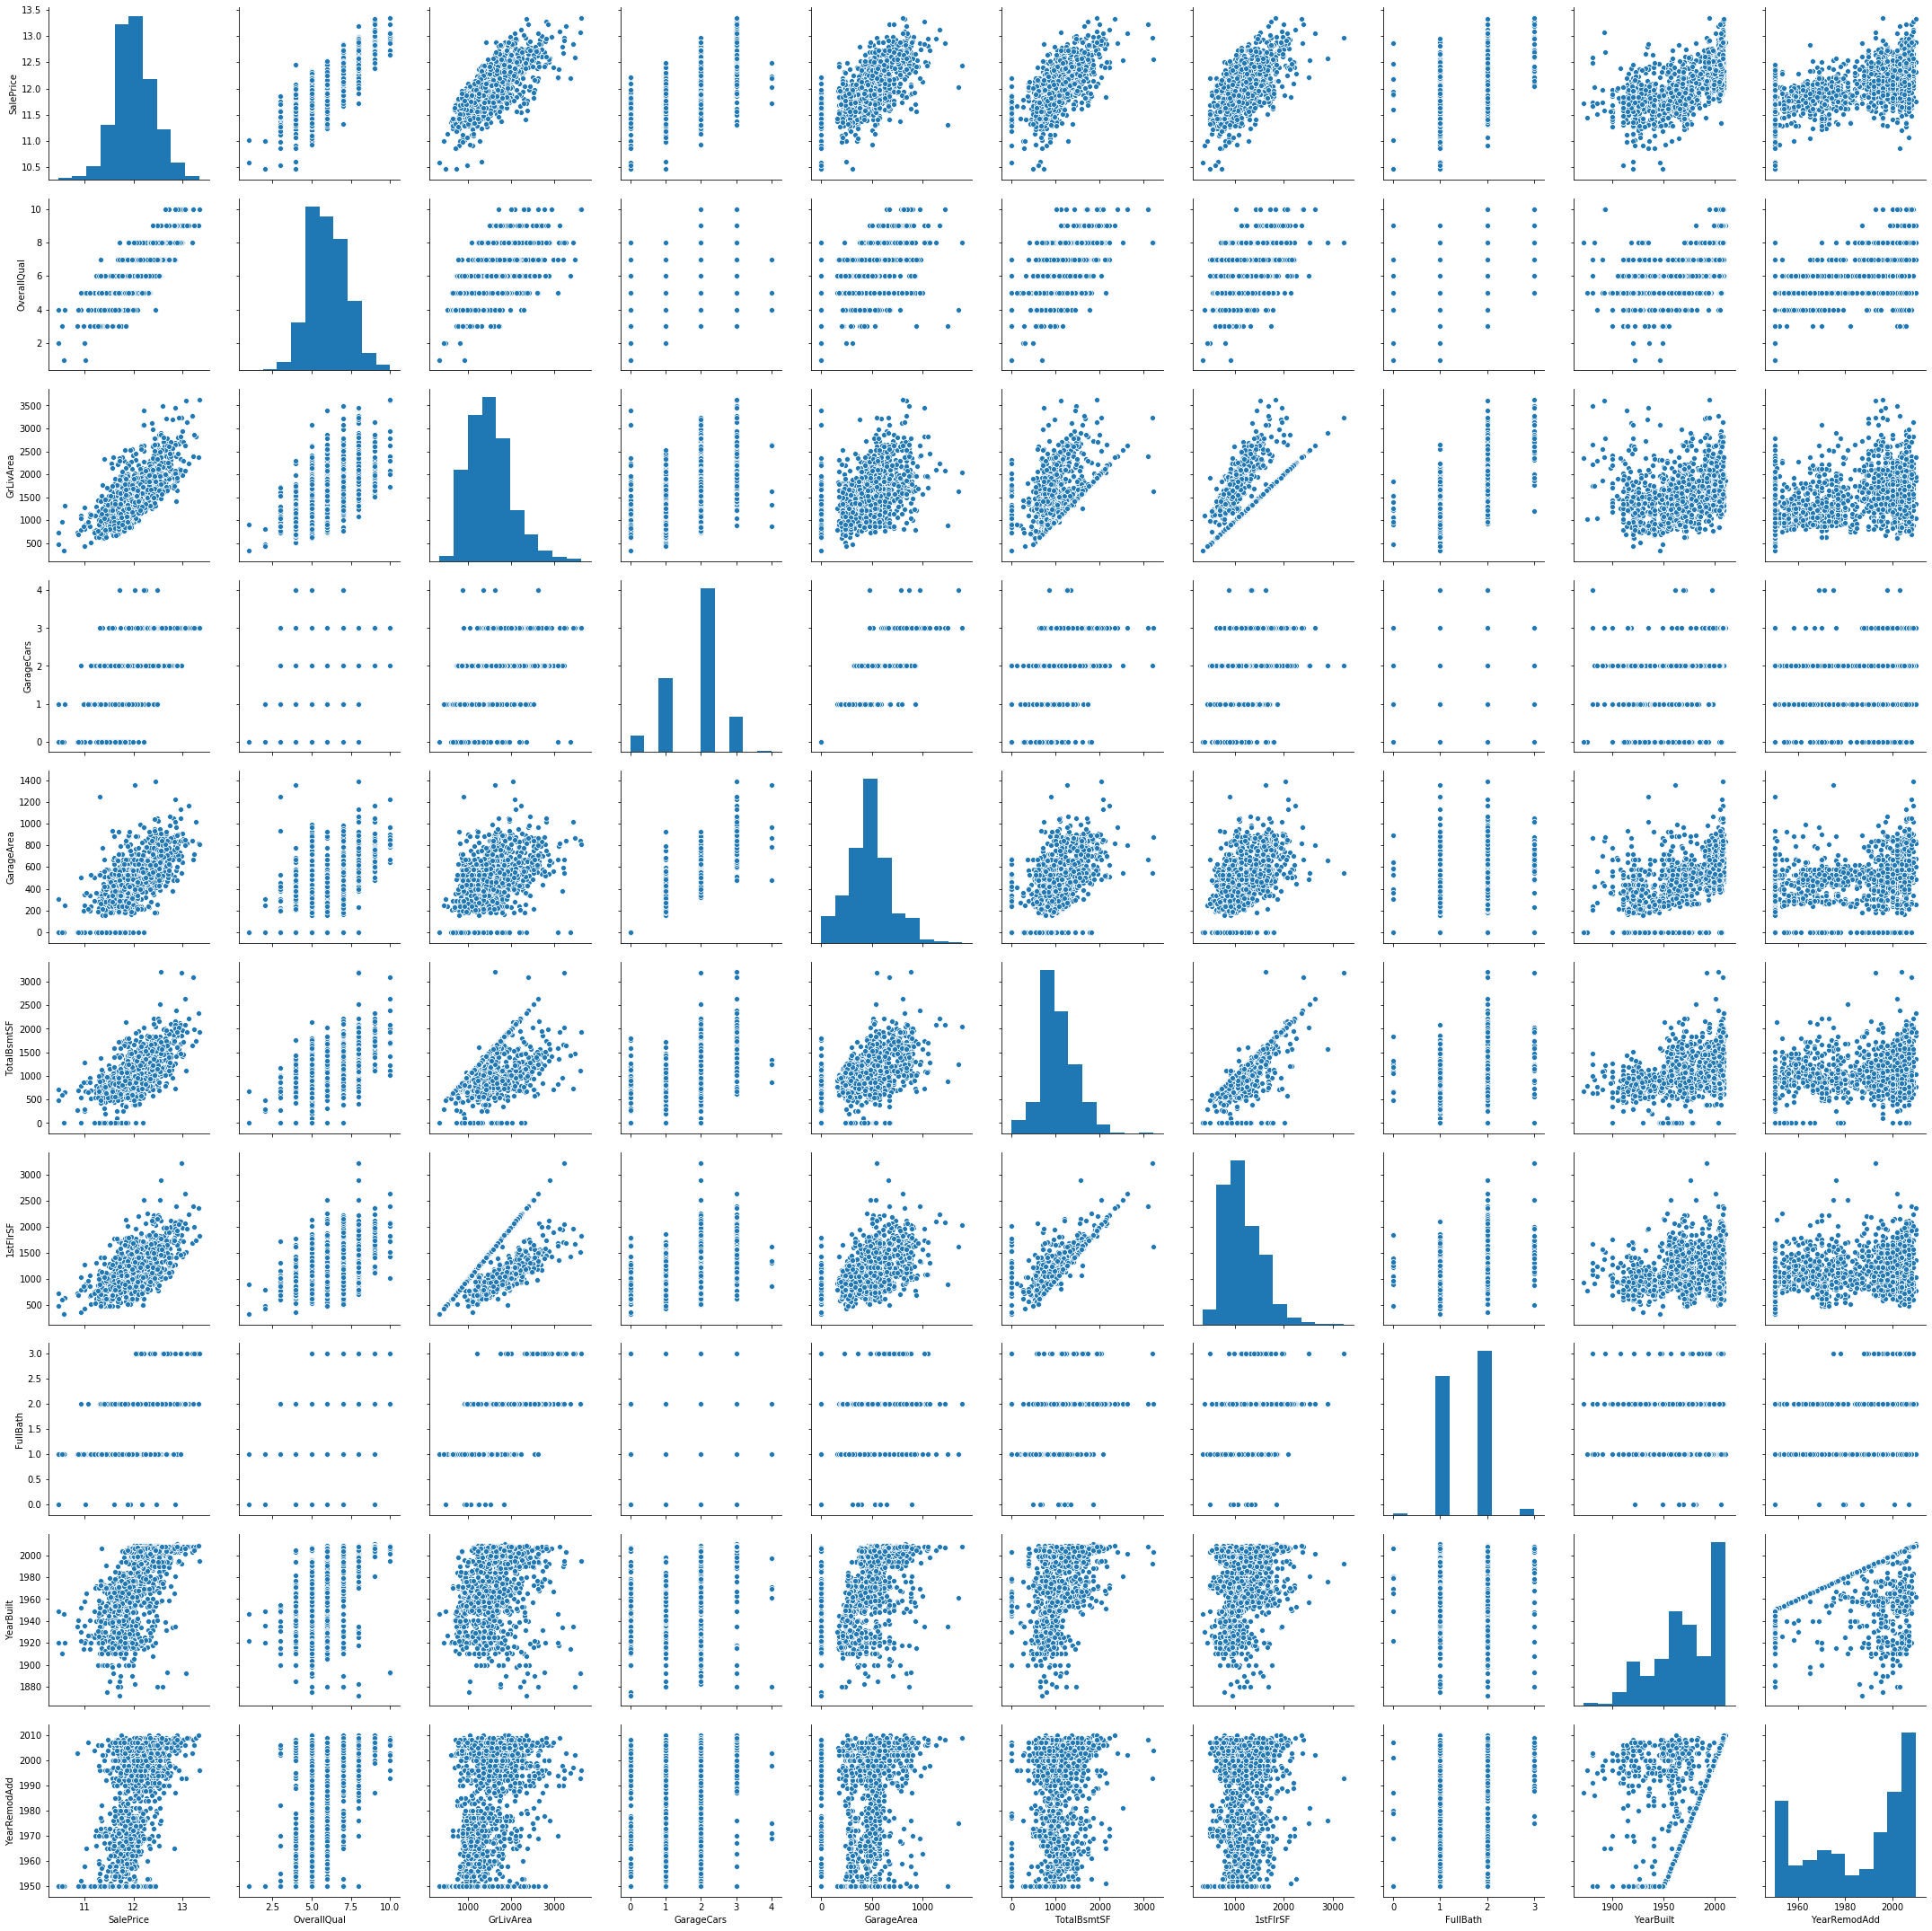

In [14]:
sns.pairplot(train_df[col], height=3)

## 변수들 정리 : Feature / Target 분리

   - 변수 분리 : 특징과 라벨에 대한 분리작업 수행 ---> id라는 컬럼은 맨 앞에 있어 0번으로 선택을 해서 지운 것
     학습할 특징에서는 제외를 하여야 하기에 drop을 이용해서 지우게 됨
     처음에는 81개의 컬럼이 있는데, 의미없는 id컬럼 제거 & 타겟에 대한 가격에 대한 것 제거를 해서 79개로 수정됨

In [15]:
train_id = train_df.iloc[:,0]
test_id = test_df.iloc[:,0]

train_df.drop('Id', axis=1, inplace=True)
test_df.drop('Id', axis=1, inplace=True)

In [16]:
y_df = train_df['SalePrice']
train_df.drop('SalePrice', axis=1, inplace=True)

print('dimension of the train :', train_df.shape)
print('dimension of the test :', test_df.shape)

dimension of the train : (1456, 79)
dimension of the test : (1459, 79)


- ▼ 우선은 나중에 사용하기 위해서, 문제들만 train/test 를 df라는 변수에 합침

In [17]:
df = pd.concat([train_df, test_df]).reset_index()

df.drop(['index'], axis=1, inplace=True)

In [18]:
print('dimension of dataset :', df.shape)
df.head()

dimension of dataset : (2915, 79)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [19]:
mc = pd.DataFrame(df.isnull().sum(), columns=['Missing Count'])
mc = mc[mc['Missing Count']!=0]
mc['Missing %'] = (mc['Missing Count'] / df.shape[0]) * 100
mc.sort_values('Missing %', ascending=False)

,Missing Count,Missing %
PoolQC,2907,99.725557
MiscFeature,2810,96.397942
Alley,2717,93.207547
Fence,2345,80.445969
FireplaceQu,1420,48.713551
LotFrontage,486,16.672384
GarageFinish,159,5.454545
GarageQual,159,5.454545
GarageCond,159,5.454545
GarageYrBlt,159,5.454545


In [20]:
nones = ['PoolQC', 'MiscFeature', 'Alley','Fence', 'FireplaceQu', 'GarageType','GarageFinish',
        'GarageQual','GarageCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
        'MasVnrType']

for none in nones:
    df[none].fillna('None',inplace = True)

In [21]:
zeros = ['GarageYrBlt','GarageArea','GarageCars','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF',
         'BsmtFullBath','BsmtHalfBath','MasVnrArea']

for zero in zeros:
    df[zero].fillna(0, inplace = True)

### Utilities 컬럼은 너무 많이 하나의 데이터로 되어 있어서, 특징으로 사용이 불가능 할 것 때문에 제거

In [22]:
Counter(df.Utilities)

Counter({'AllPub': 2912, 'NoSeWa': 1, nan: 2})

In [23]:
df.drop('Utilities', axis=1, inplace=True)

#### 아래의 컬럼들은 위의 Utilites와는 달리 너무까지는 아니지만, 빠진 것들도 존재를 하고, 많은 항목들도 있고, 치우친 것들이 있어서, 제일 많이 나타나는 항목으로 채우고자 함!!!!

In [24]:
df.loc[:, "MSZoning"].value_counts()

RL         2261
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64

In [25]:
df.loc[:, "Exterior1st"].value_counts()

VinylSd    1025
MetalSd     450
HdBoard     441
Wd Sdng     410
Plywood     221
CemntBd     125
BrkFace      87
WdShing      56
AsbShng      44
Stucco       42
BrkComm       6
AsphShn       2
Stone         2
CBlock        2
ImStucc       1
Name: Exterior1st, dtype: int64

In [26]:
freq = ['MSZoning','Exterior1st','Exterior2nd','SaleType','Electrical','KitchenQual','Functional']

for fr in freq:
    df[fr].fillna(df[fr].mode()[0], inplace=True)

#####  LotFrontage 에서는 너무 많은 값들이 이상하고, 이 값들으 좀 처리하기 위해서 비슷한 것들을 묶어서 사용을 하려고 함.    
그래서 우선은 기존의 값은 old_lotfrontage라는 컬럼으로 두고, LotArea, Neighborhood로 그룹화 해서 거기서 나오는 값을 바탕으로 처리하고자 함!!!

In [27]:
df['old_lotfrontage'] = df['LotFrontage']

#df['LotFrontage'] = df.groupby(['LotArea','Neighborhood'])['LotFrontage'].transform(lambda x: x.fillna(x.median()))
df['LotFrontage'] = df.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

* 왼쪽이 처리하기 전의 기존의 값의 분포이고, 오른쪽이 위와 같은 처리를 하였을 때의 분포를 나타낸 것임!!

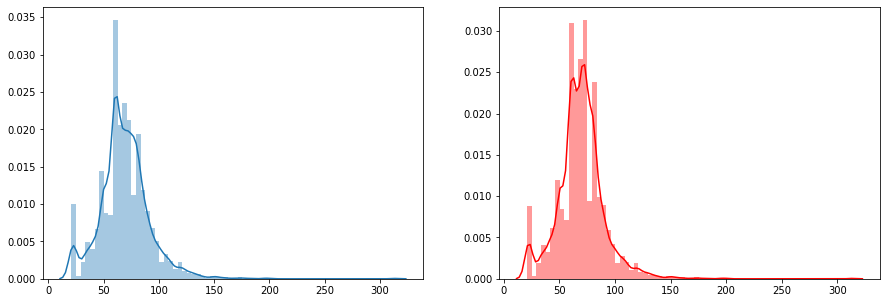

In [28]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
ol = sns.distplot(np.array(df['old_lotfrontage'].dropna()),ax=ax1,kde=True,bins=70)
lf = sns.distplot(np.array(df['LotFrontage']),ax=ax2,kde=True,bins=70,color='red')

# drop the old_lotfrontage as we finished the comparison
df.drop('old_lotfrontage',axis=1,inplace=True)

* 위와 같이 처리를 해서 이상한 값에 대한 것들을 처리를 완료함

In [29]:
print("Remaining missing values:",df.isnull().sum().sum())

Remaining missing values: 0


###  변형 및 인코딩

#### 범주형 데이터 변형

In [30]:
df['MoSold'] = df.astype(str)
df['YrSold'] = df.astype(str)
df['MSSubClass'] = df.astype(str)

nominals = ['MSSubClass','MSZoning','Street','Alley','LandContour','LotConfig','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl',
           'Exterior1st','Exterior2nd','MasVnrType','Foundation','Heating','CentralAir','GarageType','MiscFeature','SaleType','SaleCondition','MoSold','YrSold']


#### 여기서는 순서가 중요한 변수들

In [31]:
from sklearn.preprocessing import LabelEncoder

ordinals = ['LotShape','LandSlope','OverallQual','OverallCond','ExterQual','ExterCond','BsmtQual',
           'BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC','Electrical','KitchenQual',
            'Functional','FireplaceQu','GarageFinish','GarageQual','GarageCond','PavedDrive','PoolQC','Fence']

for ordinal in ordinals:
    le = LabelEncoder()
    le.fit(df[ordinal])
    df[ordinal] = le.transform(df[ordinal])

#### House Price에 상관계수가 높은 거의 비슷한 컬럼들을 종합하여서 1개의 컬럼으로  변형

In [32]:
# Total square feet of houses

df['totalArea'] = df['GrLivArea'] + df['TotalBsmtSF']

#### 수치 데이터의 분포를 보고, 얼마나 치우쳐서 있는지 확인 : +1보다 크고, -1보다 작으면 상당히 skew되어 있으며, -1~-0.5/ 0.5~1 사이에는 적당히 skew, -0.5~ 0.5 사이는 적당히 잘 분포

In [33]:
# Assign numeric features by excluding non numeric features
numeric = df.dtypes[df.dtypes != 'object'].index

# Display the skewness of each column and sort the values in descending order 
skewness = df[numeric].apply(lambda x: x.skew()).sort_values(ascending=False)

# Create a dataframe and show 5 most skewed features 
sk_df = pd.DataFrame(skewness,columns=['skewness'])
sk_df['skw'] = abs(sk_df)
sk_df.sort_values('skw',ascending=False).drop('skw',axis=1).head()

,skewness
PoolQC,-22.996032
MiscVal,21.943440
PoolArea,18.711459
LotArea,13.130516
LowQualFinSF,12.086535


#### 위의 결과들이 엄청나게 skew되어 있어서 이에 대한 변형 수행 : log1p사용 : log(x+1)

In [34]:
# As a general rule of thumb, skewness with an absolute value less than 0.5 is considered as a acceptable range of skewness for normal distribution of data
skw_feature = skewness[abs(skewness) > 0.5].index

# Transform skewed features to normal distribution by taking log(1 + input)
df[skw_feature] = np.log1p(df[skw_feature])


#### 기타 아직 변형이 안 되어 있는 아주 중요하지 않은 변수들(카테고리)을 처리

In [35]:
df = pd.get_dummies(df)
print(df.shape)

(2915, 265)


### Train / Test  분리

In [36]:
# Split the combined dataset into two: train and test

X_train = df.iloc[:train_df.shape[0],:]
X_test = df.iloc[train_df.shape[0]:,:]

#X_train, X_test, y_train, y_test = train_test_split(df,y_df, random_state = 1)

In [37]:
X_train

,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,4.189655,9.042040,1.386294,0.0,6,1.609438,7.602900,2003,5.283204,1.098612,...,0,0,0,1,0,0,0,0,1,0
1,4.394449,9.169623,1.386294,0.0,5,2.079442,7.589336,1976,0.000000,1.386294,...,0,0,0,1,0,0,0,0,1,0
2,4.234107,9.328212,0.000000,0.0,6,1.609438,7.601902,2002,5.093750,1.098612,...,0,0,0,1,0,0,0,0,1,0
3,4.110874,9.164401,0.000000,0.0,6,1.609438,7.557995,1970,0.000000,1.386294,...,0,0,0,1,1,0,0,0,0,0
4,4.442651,9.565284,0.000000,0.0,7,1.609438,7.601402,2000,5.860786,1.098612,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,4.143135,8.976894,1.386294,0.0,5,1.609438,7.600902,2000,0.000000,1.386294,...,0,0,0,1,0,0,0,0,1,0
1452,4.454347,9.486152,1.386294,0.0,5,1.791759,7.590347,1988,4.787492,1.386294,...,0,0,0,1,0,0,0,0,1,0
1453,4.204693,9.109746,1.386294,0.0,6,2.197225,7.571474,2006,0.000000,0.000000,...,0,0,0,1,0,0,0,0,1,0
1454,4.234107,9.181735,1.386294,0.0,4,1.791759,7.576097,1996,0.000000,1.386294,...,0,0,0,1,0,0,0,0,1,0


In [38]:
y_df

0       12.247699
1       12.109016
2       12.317171
3       11.849405
4       12.429220
          ...    
1455    12.072547
1456    12.254868
1457    12.493133
1458    11.864469
1459    11.901590
Name: SalePrice, Length: 1456, dtype: float64

In [39]:
# 참고로 원래의 데이터가 train / test 가 1456개, 1459개로 거의 동일한 크기의 데이터가 주어진 것!!!
print("training shape:{}, test shape:{}".format(X_train.shape,X_test.shape))

training shape:(1456, 265), test shape:(1459, 265)


### 모델링

* xgboost를 윈도우에서 사용하시는 분들은 경로 설정 추가 필요     
* mlxtend 패키지 설치

In [40]:
# 윈도우 사용자는 아래 주석 해지 필요!!!!


# import os
# mingw_path = 'C:\\Program Files\\mingw-w64\\x86_64-8.1.0-posix-seh-rt_v6-rev0\\mingw64\\bin'
# os.environ['PATH'] = mingw_path + ';' + os.environ['PATH']
# import xgboost as xgb
# from xgboost import XGBRegressor

In [41]:
# Import libraries

from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,learning_curve, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_squared_error

from sklearn.linear_model import LassoCV,ElasticNetCV,Lasso,ElasticNet
from sklearn.kernel_ridge import KernelRidge


# 아래 추가적인 패키지가 설치가 되어 있어야 함!!!!!!!
from xgboost import XGBRegressor
from mlxtend.regressor import StackingRegressor


# 시간
import time

#### 정규화 작업

In [42]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
#X_train = RobustScaler().fit_transform(X_train)
X_train = pd.DataFrame(X_train, columns = df.columns )

X_test = scaler.transform(X_test)
X_test = pd.DataFrame(X_test, columns = df.columns)
#X_test = RobustScaler().fit_transform(X_test)

In [43]:
y_df.head()

0    12.247699
1    12.109016
2    12.317171
3    11.849405
4    12.429220
Name: SalePrice, dtype: float64

In [44]:
y_df.shape

(1456,)

In [45]:
#  참고) 위에서 제일 원본 데이터는 208500이였는데, 이것을 log1p로 변환한 것을 정답지로 놓고 하는 것이니
# 하기 전에 맞게 변환이 되었는지 확인!!!!!!
np.log1p(208500)

12.24769911637256

#### 모델의 종류들 : 평가는 root-mean-squared-error 로 평가

        Ridge Regression
        Lasso Regression
        ElasticNet Regression
        Support Vector Machine
        Random Forest
        XG Boost

##### 평가 및 kfold 사용 준비

In [46]:
kfold = KFold(n_splits=6, random_state= 0, shuffle = True)

In [47]:
def rmsle_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y_df, 
                                   scoring="neg_mean_squared_error", cv = kfold))
    return(rmse)

- ridge regression

In [48]:
KR = KernelRidge()

KR_param_grid = {
    'alpha' : [0.6],
    'kernel' : ['polynomial','rbf'],
    'gamma' : np.logspace(-15,4,num=5,base=2.0),
    'degree' : [1,2,3],
    'coef0' : [1.5,2.0,2.5,3.5,4]
}

In [49]:
n_iter_search = 10
KR_rgs = RandomizedSearchCV(KR, param_distributions=KR_param_grid, cv=kfold, scoring='neg_mean_squared_error',
                            n_jobs=-1, verbose=1, random_state=1234, n_iter=n_iter_search)

KR_rgs.fit(X_train, y_df)

Fitting 6 folds for each of 10 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    5.1s finished
C:\Users\1-11\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=KFold(n_splits=6, random_state=0, shuffle=True),
                   error_score='raise-deprecating',
                   estimator=KernelRidge(alpha=1, coef0=1, degree=3, gamma=None,
                                         kernel='linear', kernel_params=None),
                   iid='warn', n_iter=10, n_jobs=-1,
                   param_distributions={'alpha': [0.6],
                                        'coef0': [1.5, 2.0, 2.5, 3.5, 4],
                                        'degree': [1, 2, 3],
                                        'gamma': array([3.05175781e-05, 8.21187906e-04, 2.20970869e-02, 5.94603558e-01,
       1.60000000e+01]),
                                        'kernel': ['polynomial', 'rbf']},
                   pre_dispatch='2*n_jobs', random_state=1234, refit=True,
                   return_train_score=False, scoring='neg_mean_squared_error',
                   verbose=1)

In [50]:
KR_rgs.best_estimator_

KernelRidge(alpha=0.6, coef0=4, degree=1, gamma=0.0008211879055212056,
            kernel='polynomial', kernel_params=None)

In [51]:
KR_param_grid = {
    'alpha' : [0.6],
    'kernel' : ['polynomial','rbf'],
    'gamma' : np.logspace(-15,4,num=5,base=2.0),
    'degree' : [1,2,3],
    'coef0' : [3,4,5]
}

In [52]:
grid_KR_clf = GridSearchCV(KR, param_grid=KR_param_grid, scoring='neg_mean_squared_error', cv=kfold, verbose=1, n_jobs=-1)

In [53]:
grid_KR_clf.fit(X_train, y_df)

Fitting 6 folds for each of 90 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 352 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:   14.2s finished
C:\Users\1-11\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=KFold(n_splits=6, random_state=0, shuffle=True),
             error_score='raise-deprecating',
             estimator=KernelRidge(alpha=1, coef0=1, degree=3, gamma=None,
                                   kernel='linear', kernel_params=None),
             iid='warn', n_jobs=-1,
             param_grid={'alpha': [0.6], 'coef0': [3, 4, 5],
                         'degree': [1, 2, 3],
                         'gamma': array([3.05175781e-05, 8.21187906e-04, 2.20970869e-02, 5.94603558e-01,
       1.60000000e+01]),
                         'kernel': ['polynomial', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=1)

In [54]:
grid_KR_clf.best_params_

{'alpha': 0.6,
 'coef0': 3,
 'degree': 2,
 'gamma': 0.0008211879055212056,
 'kernel': 'polynomial'}

In [55]:
KR_best = grid_KR_clf.best_estimator_

In [56]:
grid_KR_clf.best_score_

-0.012747755743899903

In [57]:
print("KernelRidge mean score:", rmsle_cv(KR_best).mean())
print("KernelRidge std:", rmsle_cv(KR_best).std())

KernelRidge mean score: 0.11261782609557819
KernelRidge std: 0.00800126337883843


In [58]:
y_submission_1 = np.expm1(KR_best.predict(X_test))

In [59]:
KR_best.predict(X_test)

array([11.73605573, 12.02032121, 12.13108703, ..., 12.02957541,
       11.68711938, 12.31197445])

In [60]:
y_submission_1

array([124997.33910313, 166094.99930257, 185550.36585153, ...,
       167639.21958454, 119027.63575799, 222341.54038155])

- lasso regression

In [61]:
Las = Lasso()

Las_param_grid = {
    'alpha' : [0.001,0.005,0.01,0.1,0.5,1],
    'fit_intercept' : [True, False],
    'normalize' : [True, False]
}

In [62]:
n_iter_search = 10
Las_rgs = RandomizedSearchCV(Las, param_distributions=Las_param_grid, cv=kfold, scoring='neg_mean_squared_error',
                            n_jobs=-1, verbose=1, random_state=1234, n_iter=n_iter_search)

Las_rgs.fit(X_train, y_df)

Fitting 6 folds for each of 10 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  60 | elapsed:    0.5s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.7s finished
C:\Users\1-11\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=KFold(n_splits=6, random_state=0, shuffle=True),
                   error_score='raise-deprecating',
                   estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                                   max_iter=1000, normalize=False,
                                   positive=False, precompute=False,
                                   random_state=None, selection='cyclic',
                                   tol=0.0001, warm_start=False),
                   iid='warn', n_iter=10, n_jobs=-1,
                   param_distributions={'alpha': [0.001, 0.005, 0.01, 0.1, 0.5,
                                                  1],
                                        'fit_intercept': [True, False],
                                        'normalize': [True, False]},
                   pre_dispatch='2*n_jobs', random_state=1234, refit=True,
                   return_train_score=False, scoring='neg_mean_squared_error',
                   verbose=1)

In [63]:
Las_rgs.best_estimator_

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [64]:
Las_param_grid = {
    'alpha' : [0.0005,0.0009,0.001,0.003],
    'fit_intercept' : [True, False],
    'normalize' : [True, False]
}

In [65]:
grid_Las_clf = GridSearchCV(Las, param_grid=Las_param_grid, scoring='neg_mean_squared_error', cv=kfold, verbose=1, n_jobs=-1)

In [66]:
grid_Las_clf.fit(X_train, y_df)

Fitting 6 folds for each of 16 candidates, totalling 96 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:    1.8s finished
C:\Users\1-11\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=KFold(n_splits=6, random_state=0, shuffle=True),
             error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'alpha': [0.0005, 0.0009, 0.001, 0.003],
                         'fit_intercept': [True, False],
                         'normalize': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=1)

In [67]:
grid_Las_clf.best_params_

{'alpha': 0.003, 'fit_intercept': True, 'normalize': False}

In [68]:
Las_best = grid_Las_clf.best_estimator_

In [69]:
grid_Las_clf.best_score_

-0.012667881124155442

In [70]:
print("lasso regression mean score:", rmsle_cv(Las_best).mean())
print("lasso regression std:", rmsle_cv(Las_best).std())

lasso regression mean score: 0.11213689500173814
lasso regression std: 0.009594666476606692


In [71]:
y_submission_2 = np.expm1(Las_best.predict(X_test))

In [72]:
Las_best.predict(X_test)

array([11.71834536, 11.96976109, 12.12623078, ..., 12.03806501,
       11.70246996, 12.32068331])

In [73]:
y_submission_2

array([122803.0598837 , 157905.930402  , 184651.46669173, ...,
       169068.47593322, 120868.89087285, 224286.34715378])

- elasticnet regression

In [74]:
elent = ElasticNet()

elent_param_grid = {
    'alpha' : [0.001,0.005,0.01,0.02],
    'l1_ratio' : [0.5,0.7,0.8,0.9],
    'fit_intercept' : [True, False],
    'normalize' : [True, False],
    'precompute' : [True, False],
    'max_iter' : [1000,3000],
    'tol' : [0.0001,0.00001]
}

In [75]:
n_iter_search = 10
elent_rgs = RandomizedSearchCV(elent, param_distributions=elent_param_grid, cv=kfold, scoring='neg_mean_squared_error',
                            n_jobs=-1, verbose=1, random_state=1234, n_iter=n_iter_search)

elent_rgs.fit(X_train, y_df)

Fitting 6 folds for each of 10 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    4.1s finished
C:\Users\1-11\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=KFold(n_splits=6, random_state=0, shuffle=True),
                   error_score='raise-deprecating',
                   estimator=ElasticNet(alpha=1.0, copy_X=True,
                                        fit_intercept=True, l1_ratio=0.5,
                                        max_iter=1000, normalize=False,
                                        positive=False, precompute=False,
                                        random_state=None, selection='cyclic',
                                        tol=0.0001, warm_start=False),
                   iid='warn', n_iter=10, n_jobs=-1,
                   param_distributions={'alpha': [0.001, 0.005, 0.01, 0.02],
                                        'fit_intercept': [True, False],
                                        'l1_ratio': [0.5, 0.7, 0.8, 0.9],
                                        'max_iter': [1000, 3000],
                                        'normalize': [True, False],
                                 

In [76]:
elent_rgs.best_estimator_

ElasticNet(alpha=0.02, copy_X=True, fit_intercept=True, l1_ratio=0.9,
           max_iter=3000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=1e-05, warm_start=False)

In [77]:
elent_param_grid = {
    'alpha' : [0.001,0.005,0.01,0.02],
    'l1_ratio' : [0.5,0.7,0.8,0.9],
    'fit_intercept' : [True, False],
    'normalize' : [True, False],
    'precompute' : [True, False],
    'max_iter' : [1000,3000],
    'tol' : [0.0001,0.00001]
}

In [78]:
grid_elent_clf = GridSearchCV(elent, param_grid=elent_param_grid, scoring='neg_mean_squared_error', cv=kfold, verbose=1, n_jobs=-1)

In [79]:
grid_elent_clf.fit(X_train, y_df)

Fitting 6 folds for each of 512 candidates, totalling 3072 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 674 tasks      | elapsed:   26.5s
[Parallel(n_jobs=-1)]: Done 1176 tasks      | elapsed:   40.8s
[Parallel(n_jobs=-1)]: Done 1767 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 2836 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 3072 out of 3072 | elapsed:  1.9min finished
C:\Users\1-11\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=KFold(n_splits=6, random_state=0, shuffle=True),
             error_score='raise-deprecating',
             estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True,
                                  l1_ratio=0.5, max_iter=1000, normalize=False,
                                  positive=False, precompute=False,
                                  random_state=None, selection='cyclic',
                                  tol=0.0001, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'alpha': [0.001, 0.005, 0.01, 0.02],
                         'fit_intercept': [True, False],
                         'l1_ratio': [0.5, 0.7, 0.8, 0.9],
                         'max_iter': [1000, 3000], 'normalize': [True, False],
                         'precompute': [True, False], 'tol': [0.0001, 1e-05]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=1)

In [80]:
grid_elent_clf.best_params_

{'alpha': 0.005,
 'fit_intercept': True,
 'l1_ratio': 0.5,
 'max_iter': 1000,
 'normalize': False,
 'precompute': False,
 'tol': 0.0001}

In [81]:
elent_best = grid_elent_clf.best_estimator_

In [82]:
grid_elent_clf.best_score_

-0.012600601024372673

In [83]:
print("elasticnet regression mean score:", rmsle_cv(elent_best).mean())
print("elasticnet regression std:", rmsle_cv(elent_best).std())

elasticnet regression mean score: 0.1118497039851047
elasticnet regression std: 0.00944283776047708


In [84]:
y_submission_3 = np.expm1(elent_best.predict(X_test))

In [85]:
elent_best.predict(X_test)

array([11.71987556, 11.97160539, 12.13041076, ..., 12.03999617,
       11.69964903, 12.31718879])

In [86]:
y_submission_3

array([122991.11967942, 158197.42649584, 185424.92633731, ...,
       169395.29210184, 120528.40496343, 223503.93966419])

- random forest

In [87]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

In [88]:
RF = RandomForestRegressor(n_jobs=-1, random_state=1234)

In [89]:
parameters = {
    "n_estimators" : [10,50,80,100,200,300],
    
    # The function to measure the quality of a split  : 기본 mse - mean squared error
    # "criterion":['mse', 'mae'],
    "criterion":['mse'],
    
    "max_depth" : [None ],
    
    # Default : 2
    # "min_samples_split":[1, 2],
    "min_samples_leaf" : [1,2],
    
    # 
    # "min_weight_fraction_leaf" : [],
    
    # The number of features to consider when looking for the best split:
    # If “auto”, then max_features=n_features.
    # If “sqrt”, then max_features=sqrt(n_features).
    # If “log2”, then max_features=log2(n_features).
    # If None, then max_features=n_features.
    
    # "max_features" : ["auto", "sqrt"],
    "max_features" : ["auto"],
    
    # Grow trees with max_leaf_nodes in best-first fashion.
    "max_leaf_nodes" : [None],
    
    # A node will be split if this split induces a decrease of the impurity greater than or equal to this value.
    # "min_impurity_decrease" : 
    
    # Threshold for early stopping in tree growth. A node will split if its impurity is above the threshold, otherwise it is a leaf.
    # "min_impurity_split" : []
    
    # Whether bootstrap samples are used when building trees.: Default - True
    "bootstrap" : [True],
    
    # whether to use out-of-bag samples to estimate the R^2 on unseen data.
    # Default : False
    "oob_score" : [True, False],
    
    "n_jobs" : [-1],
    
    # When set to True, reuse the solution of the previous call to fit and add more estimators to the ensemble, otherwise, just fit a whole new forest.
    "warm_start" : [True, False]
}

In [90]:
n_iter_search = 10
RF_rgs = RandomizedSearchCV(RF, param_distributions=parameters, cv=kfold, scoring='neg_mean_squared_error',
                            n_jobs=-1, verbose=1, random_state=1234, n_iter=n_iter_search)

RF_rgs.fit(X_train, y_df)

Fitting 6 folds for each of 10 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   14.5s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   21.7s finished


RandomizedSearchCV(cv=KFold(n_splits=6, random_state=0, shuffle=True),
                   error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='...
                   param_distributions={'bootstrap': [True],
                       

In [91]:
RF_rgs.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=2, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=-1,
                      oob_score=False, random_state=1234, verbose=0,
                      warm_start=True)

In [92]:
parameters = {
    "n_estimators" : [200,300,400],
    
    # The function to measure the quality of a split  : 기본 mse - mean squared error
    # "criterion":['mse', 'mae'],
    "criterion":['mse'],
    
    "max_depth" : [None ],
    
    # Default : 2
    # "min_samples_split":[1, 2],
    "min_samples_leaf" : [2],
    
    # 
    # "min_weight_fraction_leaf" : [],
    
    # The number of features to consider when looking for the best split:
    # If “auto”, then max_features=n_features.
    # If “sqrt”, then max_features=sqrt(n_features).
    # If “log2”, then max_features=log2(n_features).
    # If None, then max_features=n_features.
    
    # "max_features" : ["auto", "sqrt"],
    "max_features" : ["auto"],
    
    # Grow trees with max_leaf_nodes in best-first fashion.
    "max_leaf_nodes" : [None],
    
    # A node will be split if this split induces a decrease of the impurity greater than or equal to this value.
    # "min_impurity_decrease" : 
    
    # Threshold for early stopping in tree growth. A node will split if its impurity is above the threshold, otherwise it is a leaf.
    # "min_impurity_split" : []
    
    # Whether bootstrap samples are used when building trees.: Default - True
    "bootstrap" : [True],
    
    # whether to use out-of-bag samples to estimate the R^2 on unseen data.
    # Default : False
    "oob_score" : [True, False],
    
    "n_jobs" : [-1],
    
    # When set to True, reuse the solution of the previous call to fit and add more estimators to the ensemble, otherwise, just fit a whole new forest.
    "warm_start" : [True, False]
}

In [93]:
grid_RF_clf = GridSearchCV(RF, param_grid=parameters, scoring='neg_mean_squared_error', cv=kfold, n_jobs=-1)

In [94]:
grid_RF_clf.fit(X_train, y_df)

GridSearchCV(cv=KFold(n_splits=6, random_state=0, shuffle=True),
             error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn',...
             iid='warn', n_jobs=-1,
             param_grid={'bootstrap': [True], 'criterion': ['mse'],
                         'max_depth': [None], 'max_features': ['auto'],
                         

In [95]:
grid_RF_clf.best_params_

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_samples_leaf': 2,
 'n_estimators': 400,
 'n_jobs': -1,
 'oob_score': True,
 'warm_start': False}

In [96]:
RF_best = grid_RF_clf.best_estimator_

In [97]:
grid_RF_clf.best_score_

-0.018728723167936705

In [98]:
print("Random Forest mean score:", rmsle_cv(RF_best).mean())
print("Random Forest std:", rmsle_cv(RF_best).std())

Random Forest mean score: 0.1364658219155613
Random Forest std: 0.01027940806911841


In [99]:
y_submission_4 = np.expm1(RF_best.predict(X_test))

In [100]:
RF_best.predict(X_test)

array([11.71089331, 11.96087093, 12.05847436, ..., 11.98259591,
       11.62509748, 12.3347806 ])

In [101]:
y_submission_4

array([121891.32012291, 156508.33459369, 172554.52750753, ...,
       159945.69904677, 111869.52750712, 227470.58413328])

- xgboost regressor

In [102]:
import xgboost as xgb
from xgboost import XGBRegressor

In [103]:
XGBC = XGBRegressor(verbosity=2, n_jobs=-1, random_state=1234)

xgbc_param_grid = {
    'n_estimators' : [2000,2200,2400],
    'learning_rate' : [0.01,0.05,0.1],
    'max_depth' : [1,3,5,7],
    'colsample_bytree': [0.4603],
    'gamma' : [0.0468],
    'min_child_weight' : [1.7817],
    'reg_alpha':[0.4640], 
    'reg_lambda':[0.8571],
    'subsample':[0.5213],
    'silent':[1]
}

In [104]:
n_iter_search = 10
xgb_rgs = RandomizedSearchCV(XGBC, param_distributions=xgbc_param_grid, cv=kfold, scoring='neg_mean_squared_error',
                            n_jobs=-1, verbose=1, random_state=1234, n_iter=n_iter_search)

xgb_rgs.fit(X_train, y_df)

Fitting 6 folds for each of 10 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  8.4min finished
C:\Users\1-11\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\1-11\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


RandomizedSearchCV(cv=KFold(n_splits=6, random_state=0, shuffle=True),
                   error_score='raise-deprecating',
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=-1,...
                   param_distributions={'colsample_bytree': [0.4603],
                                        'gamma': [0.0468],
                                        'learning_rate': [0.01, 0.05, 0.1],
                                        'max_depth

In [105]:
xgb_rgs_best = xgb_rgs.best_estimator_
print(xgb_rgs_best)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4603, gamma=0.0468,
             importance_type='gain', learning_rate=0.01, max_delta_step=0,
             max_depth=5, min_child_weight=1.7817, missing=None,
             n_estimators=2400, n_jobs=-1, nthread=None, objective='reg:linear',
             random_state=1234, reg_alpha=0.464, reg_lambda=0.8571,
             scale_pos_weight=1, seed=None, silent=1, subsample=0.5213,
             verbosity=2)


In [106]:
xgbc_param_grid = {
    'n_estimators' : [2000,2200,2400],
    'learning_rate' : [0.01,0.05,0.1],
    'max_depth' : [1,3,5,7],
    'colsample_bytree': [0.4603],
    'gamma' : [0.0468],
    'min_child_weight' : [1.7817],
    'reg_alpha':[0.4640], 
    'reg_lambda':[0.8571],
    'subsample':[0.5213],
    'silent':[1]
}

In [107]:
xgb_gs = GridSearchCV(XGBC, param_grid=xgbc_param_grid, cv=kfold, scoring='neg_mean_squared_error', n_jobs=-1)

In [108]:
xgb_gs.fit(X_train, y_df)

C:\Users\1-11\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\1-11\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


GridSearchCV(cv=KFold(n_splits=6, random_state=0, shuffle=True),
             error_score='raise-deprecating',
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=-1, nthrea...
             param_grid={'colsample_bytree': [0.4603], 'gamma': [0.0468],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [1, 3, 5, 7],
                         'min_child_weight': [1.7817],
                         'n_estimators': [2000, 2200, 2400],
                         'reg_alpha': [0.464], 'reg_lambda': [0.8571],
            

In [109]:
xgb_gs.best_params_

{'colsample_bytree': 0.4603,
 'gamma': 0.0468,
 'learning_rate': 0.01,
 'max_depth': 3,
 'min_child_weight': 1.7817,
 'n_estimators': 2400,
 'reg_alpha': 0.464,
 'reg_lambda': 0.8571,
 'silent': 1,
 'subsample': 0.5213}

In [110]:
xgb_gs.best_score_

-0.013679886943277595

In [111]:
xgb_best = xgb_gs.best_estimator_

In [112]:
xgb_gs.best_score_

-0.013679886943277595

In [113]:
print("XGBoost mean score:", rmsle_cv(xgb_best).mean())
print("XGBoost std:", rmsle_cv(xgb_best).std())

C:\Users\1-11\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\1-11\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\1-11\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\1-11\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\1-11\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\1-11\Anaconda3\l

XGBoost mean score: 0.11650688861196491


C:\Users\1-11\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\1-11\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\1-11\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\1-11\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\1-11\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\1-11\Anaconda3\l

XGBoost std: 0.010208846073901141


In [114]:
y_submission_5 = np.expm1(xgb_best.predict(X_test))

In [115]:
xgb_best.predict(X_test)

array([11.716048, 11.999501, 12.148105, ..., 12.005937, 11.692   ,
       12.324167], dtype=float32)

In [116]:
y_submission_5

array([122521.29, 162672.64, 188735.03, ..., 163722.88, 119610.04,
       225069.11], dtype=float32)

In [117]:
XGB = XGBRegressor()

ELNET = ElasticNet(random_state = 1)
LCV=Lasso(random_state = 1)
SV = SVR()
KR = KernelRidge()
XG = XGBRegressor()
stack = StackingRegressor(regressors = [ELNET,LCV,XG,SV,KR], meta_regressor = XGB)

params = {  
    # mlxtend : 0.17 이하 버전기준..
    
#               'meta-xgbregressor__n_estimators' : [740*2],#740
#               'meta-xgbregressor__learning_rate': [0.01/2], #0.01
#                'meta-xgbregressor__min_child_weight':[0],
#               'meta-xgbregressor__gamma':[0.1],
#               'meta-xgbregressor__max_depth': [2],
#               'meta-xgbregressor__subsample':[0.65],
#               'meta-xgbregressor__colsample_bytree':[0.4],
#               'meta-xgbregressor__reg_alpha':[0],
#               'meta-xgbregressor__reg_lambda':[1],
    
        # mlxtend : 0.17 버전 기준 : http://rasbt.github.io/mlxtend/user_guide/regressor/StackingRegressor/
                'meta_regressor__n_estimators' : [740*2],#740
              'meta_regressor__learning_rate': [0.01/2], #0.01
               'meta_regressor__min_child_weight':[0],
              'meta_regressor__gamma':[0.1],
              'meta_regressor__max_depth': [2],
              'meta_regressor__subsample':[0.65],
              'meta_regressor__colsample_bytree':[0.4],
              'meta_regressor__reg_alpha':[0],
              'meta_regressor__reg_lambda':[1],

              
              'lasso__alpha':[0.00244736842105],
              'elasticnet__alpha':[0.0276315789474],
              'elasticnet__l1_ratio':[0.09],
              'xgbregressor__min_child_weight':[0.2],
              'xgbregressor__n_estimators' : [870],
              'xgbregressor__learning_rate': [0.04],
              'xgbregressor__gamma':[0],
              'xgbregressor__max_depth': [3],
              'xgbregressor__subsample':[0.8],
              'xgbregressor__colsample_bytree':[0.7],
    
              'kernelridge__alpha':[0.93],
              'kernelridge__coef0':[1.5],
              'kernelridge__degree':[3],
              'kernelridge__gamma':[0.001],
              'kernelridge__kernel':['polynomial'],
              'kernelridge__kernel_params':[None],
              
              'svr__coef0':[1.6],
              'svr__kernel':['poly'],
              'svr__epsilon':[0.03],
              'svr__gamma': ['auto'],
              'svr__degree': [2],
              'svr__C':[0.1]
        }

grid = GridSearchCV(estimator = stack, param_grid=params,cv=kfold,refit=True, verbose=1,n_jobs=-1,scoring="neg_mean_squared_error")
grid.fit(X_train, y_df)
grid_best = grid.best_estimator_
print(grid_best)


Fitting 6 folds for each of 1 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:   28.3s finished
C:\Users\1-11\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\1-11\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[13:53:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\1-11\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\1-11\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[13:54:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
StackingRegressor(meta_regressor=XGBRegressor(base_score=0.5, booster='gbtree',
                                              colsample_bylevel=1,
                                              colsample_bynode=1,
                                              colsample_bytree=0.4, gamma=0.1,
                                              importance_type='gain',
                                              learning_rate=0.005,
                                              max_delta_step=0, max_depth=2,
                                              min_child_weight=0, missing=None,
                                              n_estimators=1480, n_jobs=1,
                                              nthread=None,
                                              objective='reg:linear',
                                              random_state=0, reg_alpha=0,
                  

In [118]:
print("Stacking mean score:", rmsle_cv(grid_best).mean())
print("Stacking std:", rmsle_cv(grid_best).std())

C:\Users\1-11\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[13:54:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\1-11\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[13:55:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\1-11\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[13:55:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\1-11\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[13:56:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\1-11\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[13:56:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\1-11\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[13:56:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\1-11\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[13:56:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\1-11\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[13:57:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\1-11\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[13:57:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\1-11\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[13:57:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\1-11\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[13:57:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\1-11\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[13:58:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Stacking mean score: 0.10966790991814977


C:\Users\1-11\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[13:58:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\1-11\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[13:58:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\1-11\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[13:58:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\1-11\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[13:59:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\1-11\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[13:59:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\1-11\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[14:00:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\1-11\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[14:00:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\1-11\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[14:01:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\1-11\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[14:01:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\1-11\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[14:02:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\1-11\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[14:02:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\1-11\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[14:02:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Stacking std: 0.008382367594737454


In [119]:
y_submission_st = np.expm1(grid.predict(X_test))

In [120]:
y_submission_st

array([123985.64, 162655.27, 188329.22, ..., 164223.44, 113210.22,
       220184.8 ], dtype=float32)

# voting

In [121]:
from sklearn.ensemble import VotingRegressor

In [136]:
y_submission_voting = (y_submission_1 + 2 * y_submission_2 + y_submission_3 + 6 * y_submission_st) / 10

In [137]:
y_submission_voting

array([123750.845355  , 161603.59116024, 187025.34755723, ...,
       166051.20885528, 116055.51349671, 221552.69243533])

In [138]:
# 출력용 만들기

predReg = pd.DataFrame({"Id": test_id, "SalePrice":y_submission_voting})

# outpath
out_path = "C:/Users/1-11/Jupyter/02_house_price/train_sub.csv"
predReg.to_csv(out_path, index = False)